<a href="https://colab.research.google.com/github/AliRasikh/Building-Analytics_Predicting-builing-s-functionality_AI-Classifier-Models/blob/main/Building_Analytics_Hamburg_houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/Parquet to CSV Converter - Hamburg.csv', low_memory=False)
df.head()

,gmlid,latitude,longitude,schema,schema_granular,data_source,building_area,building_type,building_function,has_living_function,...,terrain_triangle_count,building_age_census,building_age_census_probability,building_age_census_status,building_age_alkis,distance_to_street,distance_to_city,distance_to_border,municipality_name,__index_level_0__
0,DEHHALKA100010dI,53.690294,10.094055,Hamburg,hamburg,citydb,82.447124,Reihenhaus (Ende),Wohnhaus,true,...,2,\N,\N,\N,2010,11.64,0.146815,0.145896,Hamburg,2954887
1,DEHHALKA10001bXM,53.469230,9.839075,Hamburg,hamburg,citydb,99.420004,Ein-/Mehrfamilienhaus,Wohnhaus,true,...,2,\N,\N,\N,2010,9.88,0.128334,0.161368,Hamburg,2954888
2,DEHHALKA10003Rw2,53.561675,10.113988,Hamburg,hamburg,citydb,27.519339,\N,Garage,false,...,4,\N,\N,\N,2010,15.81,0.058638,0.218858,Hamburg,2954889
3,DEHHALKA10005JoK,53.467988,10.187066,Hamburg,hamburg,citydb,126.235461,\N,Gebäude zur Energieversorgung,false,...,2,\N,\N,\N,2011,51.02,0.126264,0.366051,Hamburg,2954890
4,DEHHALKA10005xaV,53.566455,9.828951,Hamburg,hamburg,citydb,62.570851,Doppelhaushälfte,Wohnhaus,true,...,7,1949 - 1978,1.0,census,1500,8.05,0.110474,0.14772,Hamburg,2954891


In [ ]:
df.columns

Index(['gmlid', 'latitude', 'longitude', 'schema', 'schema_granular',
       'data_source', 'building_area', 'building_type', 'building_function',
       'has_living_function', 'family_home', 'is_main_building',
       'building_part_count', 'area', 'perimeter', 'npi', 'npi_norm',
       'footprint_vertices', 'n_neighbour', 'body_volume', 'calculated_gfs',
       'calculated_ls', 'roof_type', 'roof_area', 'roof_coverage',
       'roof_volume', 'roof_surface_count', 'roof_z_min', 'roof_z_max',
       'roof_pitch_mean', 'roof_pitch_min', 'roof_pitch_max', 'roof_pitch_var',
       'roof_triangle_count', 'flat_roof', 'flat_roof_ratio',
       'roof_height_mean', 'roof_height_min', 'roof_height_max',
       'roof_height_relative', 'measured_height', 'storeys_alkis',
       'storeys_model', 'storeys_calculated', 'storeys', 'storeys_source',
       'ceiling_height', 'storeys_under_roof', 'living_space_calculated',
       'gross_floor_space_calculated', 'height_max', 'body_height',
       'hei

Removing duplicates

In [ ]:
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.replace(r'\N', np.nan))
df.head(5)

,gmlid,latitude,longitude,schema,schema_granular,data_source,building_area,building_type,building_function,has_living_function,...,terrain_triangle_count,building_age_census,building_age_census_probability,building_age_census_status,building_age_alkis,distance_to_street,distance_to_city,distance_to_border,municipality_name,__index_level_0__
0,DEHHALKA100010dI,53.690294,10.094055,Hamburg,hamburg,citydb,82.447124,Reihenhaus (Ende),Wohnhaus,true,...,2,NaN,NaN,NaN,2010,11.64,0.146815,0.145896,Hamburg,2954887
1,DEHHALKA10001bXM,53.469230,9.839075,Hamburg,hamburg,citydb,99.420004,Ein-/Mehrfamilienhaus,Wohnhaus,true,...,2,NaN,NaN,NaN,2010,9.88,0.128334,0.161368,Hamburg,2954888
2,DEHHALKA10003Rw2,53.561675,10.113988,Hamburg,hamburg,citydb,27.519339,NaN,Garage,false,...,4,NaN,NaN,NaN,2010,15.81,0.058638,0.218858,Hamburg,2954889
3,DEHHALKA10005JoK,53.467988,10.187066,Hamburg,hamburg,citydb,126.235461,NaN,Gebäude zur Energieversorgung,false,...,2,NaN,NaN,NaN,2011,51.02,0.126264,0.366051,Hamburg,2954890
4,DEHHALKA10005xaV,53.566455,9.828951,Hamburg,hamburg,citydb,62.570851,Doppelhaushälfte,Wohnhaus,true,...,7,1949 - 1978,1.0,census,1500,8.05,0.110474,0.14772,Hamburg,2954891


Firstly, we need to remove all nulls in the building_type column, in order to later predict the values.

In [ ]:
df_type_edited = df.query('building_type.notnull()')
df_type_edited.head()

,gmlid,latitude,longitude,schema,schema_granular,data_source,building_area,building_type,building_function,has_living_function,...,terrain_triangle_count,building_age_census,building_age_census_probability,building_age_census_status,building_age_alkis,distance_to_street,distance_to_city,distance_to_border,municipality_name,__index_level_0__
0,DEHHALKA100010dI,53.690294,10.094055,Hamburg,hamburg,citydb,82.447124,Reihenhaus (Ende),Wohnhaus,true,...,2,NaN,NaN,NaN,2010,11.64,0.146815,0.145896,Hamburg,2954887
1,DEHHALKA10001bXM,53.469230,9.839075,Hamburg,hamburg,citydb,99.420004,Ein-/Mehrfamilienhaus,Wohnhaus,true,...,2,NaN,NaN,NaN,2010,9.88,0.128334,0.161368,Hamburg,2954888
4,DEHHALKA10005xaV,53.566455,9.828951,Hamburg,hamburg,citydb,62.570851,Doppelhaushälfte,Wohnhaus,true,...,7,1949 - 1978,1.0,census,1500,8.05,0.110474,0.14772,Hamburg,2954891
8,DEHHALKA10006ETY,53.454722,9.928948,Hamburg,hamburg,citydb,70.597141,Reihenhaus (Ende),Wohnhaus,true,...,9,2009 und später,1.0,census,2011,14.92,0.103824,0.117368,Hamburg,2954895
10,DEHHALKA10007TBI,53.570958,10.139567,Hamburg,hamburg,citydb,53.835865,Reihenhaus (Mitte),Wohnhaus,true,...,5,NaN,NaN,NaN,2012,2.95,0.075434,0.064478,Hamburg,2954897


Secondly, it makes sense to remove all columns that are out of the scope of the analysis:

In [ ]:
columns = [
    'latitude',
    'longitude',
    'building_area',
    'building_type',
    'building_function',
    'has_living_function',
    'family_home',
    'is_main_building',
    'building_part_count',
    'area',
    'perimeter',
    'body_volume',
    'roof_height_mean',
    'measured_height',
    'ceiling_height',
    'living_space_calculated',
    'body_height',
    'terrain_pitch_mean',
    'building_age_census',
    'distance_to_city'
]
new_df = df_type_edited[columns]
new_df.reset_index(drop=True, inplace=True)
new_df.head()

,latitude,longitude,building_area,building_type,building_function,has_living_function,family_home,is_main_building,building_part_count,area,perimeter,body_volume,roof_height_mean,measured_height,ceiling_height,living_space_calculated,body_height,terrain_pitch_mean,building_age_census,distance_to_city
0,53.690294,10.094055,82.447124,Reihenhaus (Ende),Wohnhaus,true,Single,true,1,82.39,37.55,509,0.9399999976158142,7.12,3.33,131.92,6.18,0,NaN,0.146815
1,53.469230,9.839075,99.420004,Ein-/Mehrfamilienhaus,Wohnhaus,true,Single,true,1,99.34,39.99,473,5.110000133514404,9.89,7.33,79.54,4.77,0,NaN,0.128334
2,53.566455,9.828951,62.570851,Doppelhaushälfte,Wohnhaus,true,Single,true,3,62.52,33.11,393,1.7039836645126343,8.08,3.6,100.11,6.3,2.85,1949 - 1978,0.110474
3,53.454722,9.928948,70.597141,Reihenhaus (Ende),Wohnhaus,true,Single,true,2,70.55,35.58,592,3.131145477294922,11.68,5.02,112.96,8.4,0.88,2009 und später,0.103824
4,53.570958,10.139567,53.835865,Reihenhaus (Mitte),Wohnhaus,true,Single,true,1,53.80,32.08,525,0,9.77,3.26,129.22,9.77,0,NaN,0.075434


In [ ]:
new_df.columns

Index(['latitude', 'longitude', 'building_area', 'building_type',
       'building_function', 'has_living_function', 'family_home',
       'is_main_building', 'building_part_count', 'area', 'perimeter',
       'body_volume', 'roof_height_mean', 'measured_height', 'ceiling_height',
       'living_space_calculated', 'body_height', 'terrain_pitch_mean',
       'building_age_census', 'distance_to_city'],
      dtype='object')

In [ ]:
new_df.isnull().sum()

,0
latitude,0
longitude,0
building_area,0
building_type,0
building_function,0
has_living_function,0
family_home,6
is_main_building,0
building_part_count,0
area,0


Filtering missing booleans, because we cannot replace them

In [ ]:
print(new_df['is_main_building'].isna().sum(), new_df['has_living_function'].isna().sum(), new_df['family_home'].isna().sum())

0 0 6


In [ ]:
new_df = new_df.query('family_home.notnull()')
new_df

,latitude,longitude,building_area,building_type,building_function,has_living_function,family_home,is_main_building,building_part_count,area,perimeter,body_volume,roof_height_mean,measured_height,ceiling_height,living_space_calculated,body_height,terrain_pitch_mean,building_age_census,distance_to_city
0,53.690294,10.094055,82.447124,Reihenhaus (Ende),Wohnhaus,true,Single,true,1,82.39,37.55,509,0.9399999976158142,7.12,3.33,131.92,6.18,0,NaN,0.146815
1,53.469230,9.839075,99.420004,Ein-/Mehrfamilienhaus,Wohnhaus,true,Single,true,1,99.34,39.99,473,5.110000133514404,9.89,7.33,79.54,4.77,0,NaN,0.128334
2,53.566455,9.828951,62.570851,Doppelhaushälfte,Wohnhaus,true,Single,true,3,62.52,33.11,393,1.7039836645126343,8.08,3.6,100.11,6.3,2.85,1949 - 1978,0.110474
3,53.454722,9.928948,70.597141,Reihenhaus (Ende),Wohnhaus,true,Single,true,2,70.55,35.58,592,3.131145477294922,11.68,5.02,112.96,8.4,0.88,2009 und später,0.103824
4,53.570958,10.139567,53.835865,Reihenhaus (Mitte),Wohnhaus,true,Single,true,1,53.80,32.08,525,0,9.77,3.26,129.22,9.77,0,NaN,0.075434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197298,53.469498,9.832507,69.328516,Reihenhaus (Ende),Wohnhaus,true,Single,true,1,69.27,35.14,315,5.179999828338623,9.74,7.15,55.46,4.56,0,NaN,0.131276
197299,53.522266,9.780600,69.025311,Reihenhaus (Ende),Wohnhaus,true,Single,true,3,68.97,36.50,453,3.8014168739318848,10.71,4.32,110.45,6.58,0.44,1991 - 1995,0.139287
197300,53.476326,9.890536,153.699525,Ein-/Mehrfamilienhaus,Wohnhaus,true,Single,true,5,153.59,58.85,652,2.9098360538482666,7.25,5.75,122.96,4.25,1.12,1979 - 1986,0.100856
197301,53.467347,9.852954,74.631502,Ein-/Mehrfamilienhaus,Wohnhaus,true,Single,true,2,74.58,36.59,317,4.561246395111084,9.07,6.66,59.7,4.26,6.95,1949 - 1978,0.123093


after deleting NAs in the building_type column, there are only main buildings with living functions left. Therefore, the columns are not relevant anymore.

In [ ]:
new_df.drop(columns=['is_main_building', 'has_living_function'], inplace=True)

In [ ]:
new_df.dtypes

,0
latitude,float64
longitude,float64
building_area,float64
building_type,object
building_function,object
family_home,object
building_part_count,int64
area,float64
perimeter,float64
body_volume,object


In [ ]:
new_df['building_age_census'] = new_df['building_age_census'].apply(lambda x: 'unknown' if pd.isnull(x) else x)
new_df['building_age_census'].value_counts()

,count
building_age_census,
unknown,79706
1949 - 1978,63680
1919 - 1948,21336
Vor 1919,17779
1979 - 1986,5248
1991 - 1995,2464
1996 - 2000,2453
1987 - 1990,1493
2005 - 2008,1436


In [ ]:
columns = ['body_volume', 'roof_height_mean', 'measured_height', 'living_space_calculated', 'ceiling_height', 'body_height', 'terrain_pitch_mean', 'distance_to_city']
new_df[columns] = new_df[columns].astype(float)
new_df.dtypes

,0
latitude,float64
longitude,float64
building_area,float64
building_type,object
building_function,object
family_home,object
building_part_count,int64
area,float64
perimeter,float64
body_volume,float64


In [ ]:
new_df.shape

(197297, 18)

In [ ]:
new_df.isnull().sum()

,0
latitude,0
longitude,0
building_area,0
building_type,0
building_function,0
family_home,0
building_part_count,0
area,0
perimeter,0
body_volume,4787


<Figure size 1000x400 with 0 Axes>

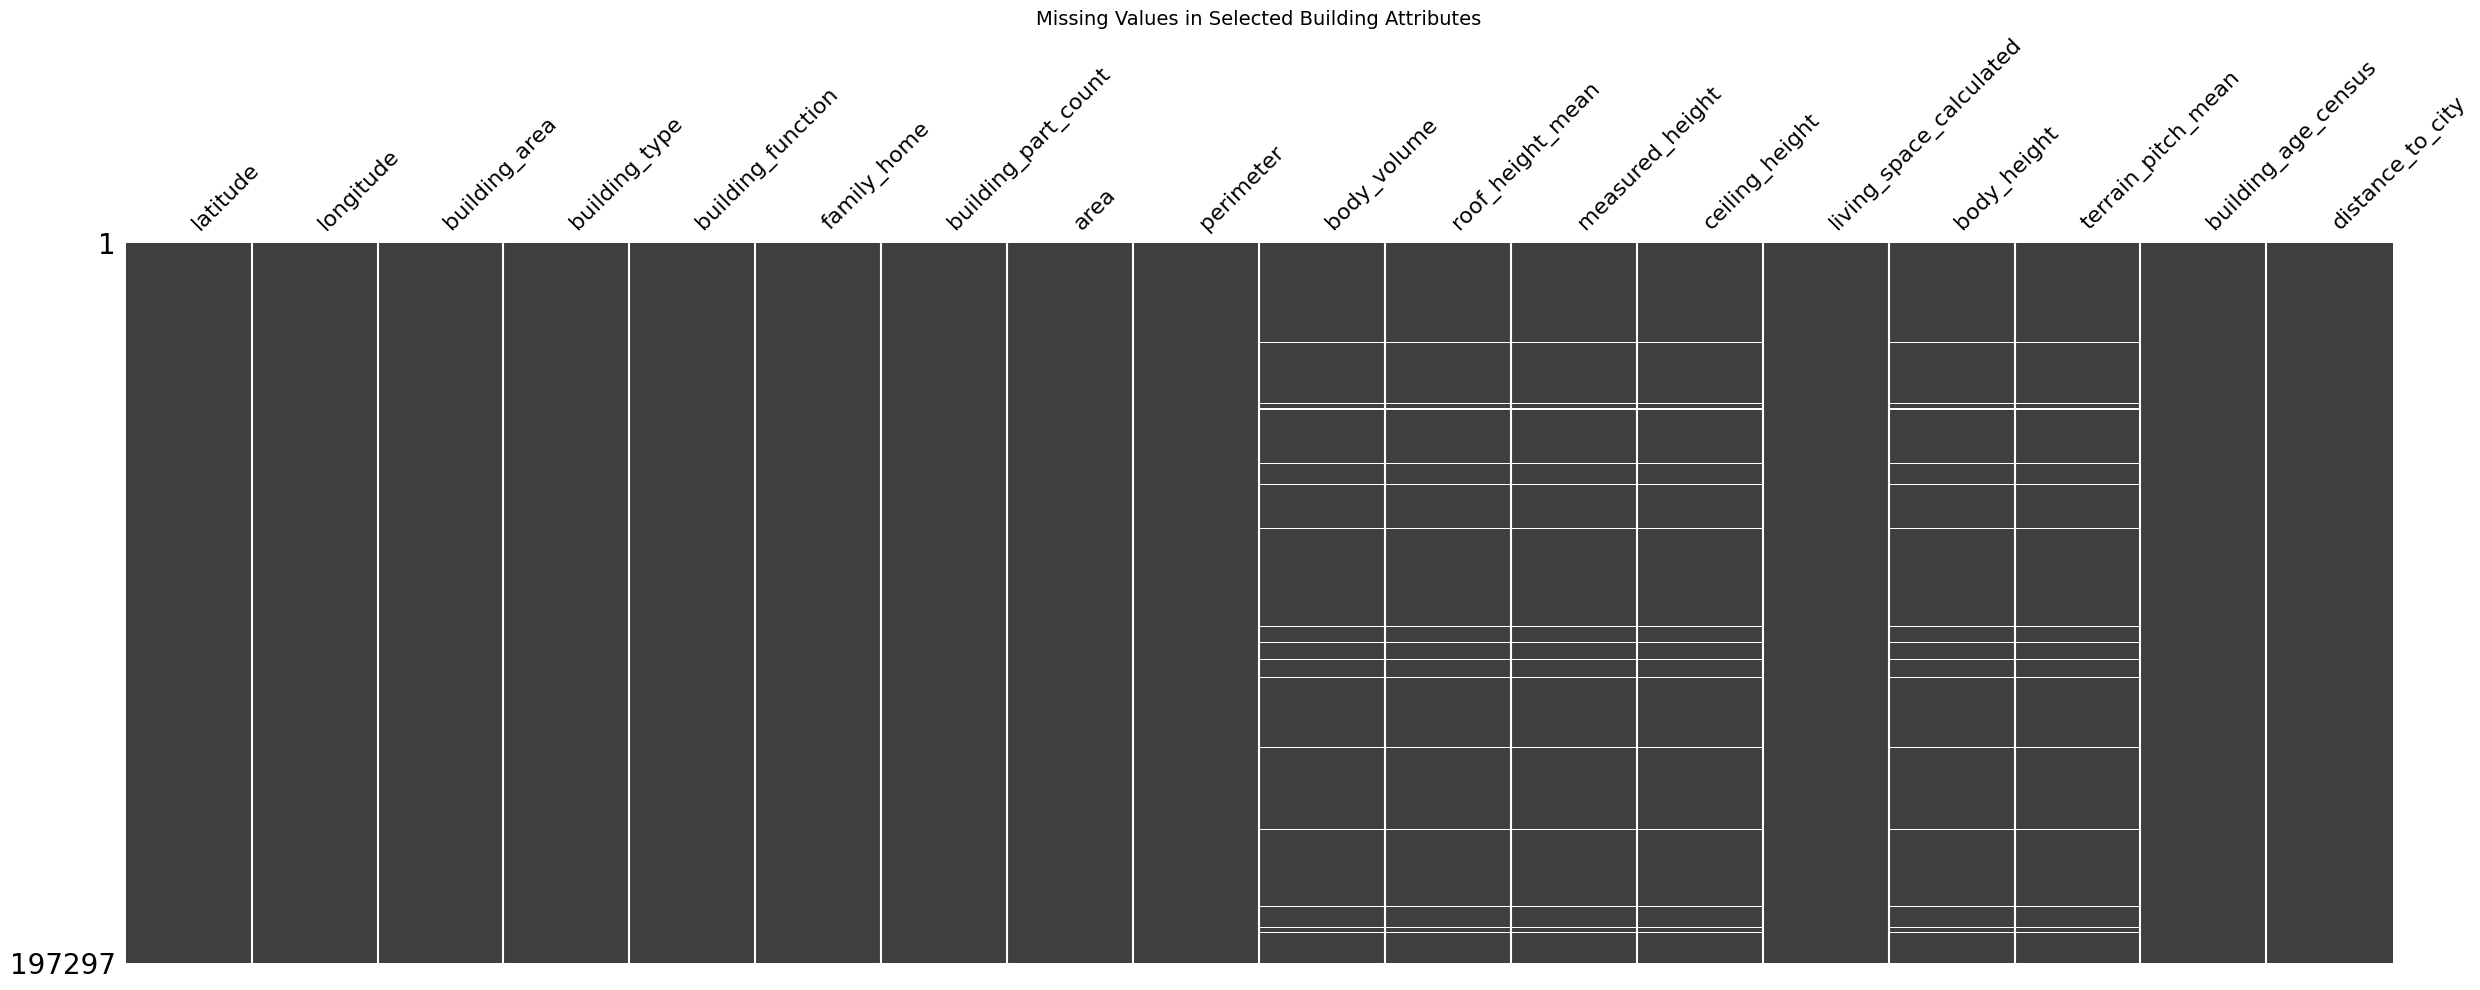

In [ ]:
import missingno as msno #
import matplotlib.pyplot as plt

selected_columns = [
    'body_volume',
    'roof_height_mean',
    'measured_height',
    'ceiling_height',
    'terrain_pitch_mean'
]

# Create the missing value matrix plot
plt.figure(figsize=(10, 4))
msno.matrix(new_df, sparkline=False) #transforms missing values into a matrix
plt.title("Missing Values in Selected Building Attributes", fontsize=14)
plt.tight_layout()
plt.show()

The reason for data missing was most probably restrictad access to the data of houses. The number of such cases is around 2.5%, so it won't have a significant impact on the prediction. The number for missing values per row will be set to 2.

In [ ]:
df_clean = new_df[new_df.isnull().sum(axis=1) <= 2]
df_clean.isnull().sum()

,0
latitude,0
longitude,0
building_area,0
building_type,0
building_function,0
family_home,0
building_part_count,0
area,0
perimeter,0
body_volume,9


Remaining missing values can be imputed with help of iterative imputation that takes other attributes and predicts missing values.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = ['body_volume',
                     'measured_height',
                     'body_height',
                     'terrain_pitch_mean',
                     'living_space_calculated',
                     'building_area',
                     'perimeter']

iterative_imputer = df_clean.copy()

imputer = IterativeImputer(random_state=42)
iterative_imputer[columns_to_impute] = imputer.fit_transform(df_clean[columns_to_impute])
iterative_imputer.isnull().sum()
df_clean_final = iterative_imputer

In [ ]:




.isnull().sum()

,0
latitude,0
longitude,0
building_area,0
building_type,0
building_function,0
family_home,0
building_part_count,0
area,0
perimeter,0
body_volume,0


In [ ]:
df_clean_final

,latitude,longitude,building_area,building_type,building_function,family_home,building_part_count,area,perimeter,body_volume,roof_height_mean,measured_height,ceiling_height,living_space_calculated,body_height,terrain_pitch_mean,building_age_census,distance_to_city
0,53.690294,10.094055,82.447124,Reihenhaus (Ende),Wohnhaus,Single,1,82.39,37.55,509.0,0.940000,7.12,3.33,131.92,6.18,0.00,unknown,0.146815
1,53.469230,9.839075,99.420004,Ein-/Mehrfamilienhaus,Wohnhaus,Single,1,99.34,39.99,473.0,5.110000,9.89,7.33,79.54,4.77,0.00,unknown,0.128334
2,53.566455,9.828951,62.570851,Doppelhaushälfte,Wohnhaus,Single,3,62.52,33.11,393.0,1.703984,8.08,3.60,100.11,6.30,2.85,1949 - 1978,0.110474
3,53.454722,9.928948,70.597141,Reihenhaus (Ende),Wohnhaus,Single,2,70.55,35.58,592.0,3.131145,11.68,5.02,112.96,8.40,0.88,2009 und später,0.103824
4,53.570958,10.139567,53.835865,Reihenhaus (Mitte),Wohnhaus,Single,1,53.80,32.08,525.0,0.000000,9.77,3.26,129.22,9.77,0.00,unknown,0.075434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197298,53.469498,9.832507,69.328516,Reihenhaus (Ende),Wohnhaus,Single,1,69.27,35.14,315.0,5.180000,9.74,7.15,55.46,4.56,0.00,unknown,0.131276
197299,53.522266,9.780600,69.025311,Reihenhaus (Ende),Wohnhaus,Single,3,68.97,36.50,453.0,3.801417,10.71,4.32,110.45,6.58,0.44,1991 - 1995,0.139287
197300,53.476326,9.890536,153.699525,Ein-/Mehrfamilienhaus,Wohnhaus,Single,5,153.59,58.85,652.0,2.909836,7.25,5.75,122.96,4.25,1.12,1979 - 1986,0.100856
197301,53.467347,9.852954,74.631502,Ein-/Mehrfamilienhaus,Wohnhaus,Single,2,74.58,36.59,317.0,4.561246,9.07,6.66,59.70,4.26,6.95,1949 - 1978,0.123093


In [ ]:
df_clean_final.to_csv('Hamburg_houses.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Exploratory Data Analysis

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Hamburg_houses.csv")

print(df.head())

   Unnamed: 0   latitude  longitude  building_area          building_type  \
0           0  53.690294  10.094055      82.447124      Reihenhaus (Ende)   
1           1  53.469230   9.839075      99.420004  Ein-/Mehrfamilienhaus   
2           2  53.566455   9.828951      62.570851       Doppelhaushälfte   
3           3  53.454722   9.928948      70.597141      Reihenhaus (Ende)   
4           4  53.570958  10.139567      53.835865     Reihenhaus (Mitte)   

  building_function family_home  building_part_count   area  perimeter  \
0          Wohnhaus      Single                    1  82.39      37.55   
1          Wohnhaus      Single                    1  99.34      39.99   
2          Wohnhaus      Single                    3  62.52      33.11   
3          Wohnhaus      Single                    2  70.55      35.58   
4          Wohnhaus      Single                    1  53.80      32.08   

   body_volume  roof_height_mean  measured_height  ceiling_height  \
0        509.0         

In [ ]:
print(df.dtypes)

Unnamed: 0                   int64
latitude                   float64
longitude                  float64
building_area              float64
building_type               object
building_function           object
family_home                 object
building_part_count          int64
area                       float64
perimeter                  float64
body_volume                float64
roof_height_mean           float64
measured_height            float64
ceiling_height             float64
living_space_calculated    float64
body_height                float64
terrain_pitch_mean         float64
building_age_census         object
distance_to_city           float64
dtype: object


In [ ]:
numeric = df.select_dtypes(include=['float64', 'int64']).columns
categorical = df.select_dtypes(include='object').columns

df[numeric].describe()

,Unnamed: 0,latitude,longitude,building_area,building_part_count,area,perimeter,body_volume,roof_height_mean,measured_height,ceiling_height,living_space_calculated,body_height,terrain_pitch_mean,distance_to_city
count,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000,192519.000000
mean,98657.415876,53.574149,10.019350,170.886079,2.351461,170.768750,55.504233,1497.696664,2.814292,10.297271,4.947347,375.402717,6.804923,1.588283,0.094026
std,56963.187776,0.069457,0.117790,219.162106,1.715823,219.012274,34.949822,3557.976010,1.912592,4.121018,1.617657,1073.147656,4.166681,2.346910,0.035965
min,0.000000,53.397757,8.489374,11.288984,1.000000,11.280000,13.670000,-395.988322,0.000000,0.040000,0.040000,9.220000,0.010000,0.000000,0.000718
25%,49318.500000,53.535554,9.931787,76.667925,1.000000,76.620000,36.850000,367.000000,1.142206,8.000000,3.620000,79.930000,4.080000,0.000000,0.070610
50%,98647.000000,53.582925,10.021642,114.779886,2.000000,114.700000,46.280000,537.000000,3.107511,9.350000,4.530000,115.410000,5.680000,0.820000,0.097220
75%,147982.500000,53.629170,10.116731,180.928360,3.000000,180.805000,60.090000,1295.000000,4.275513,11.480000,6.300000,304.825000,7.900000,2.240000,0.115933
max,197302.000000,53.922448,10.309698,34481.013638,21.000000,34457.960000,1520.570000,518592.000000,13.666908,94.510000,22.160000,165508.840000,94.510000,48.760000,0.999573


In [ ]:
df[categorical].nunique()
df[categorical].value_counts().head()

building_type          building_function  family_home  building_age_census
Ein-/Mehrfamilienhaus  Wohnhaus           Single       1949 - 1978            26165
                                                       unknown                16891
Reihenhaus (Mitte)     Wohnhaus           Single       unknown                15802
Reihenhaus (Ende)      Wohnhaus           Single       unknown                12586
Ein-/Mehrfamilienhaus  Wohnhaus           Single       1919 - 1948            10853
Name: count, dtype: int64

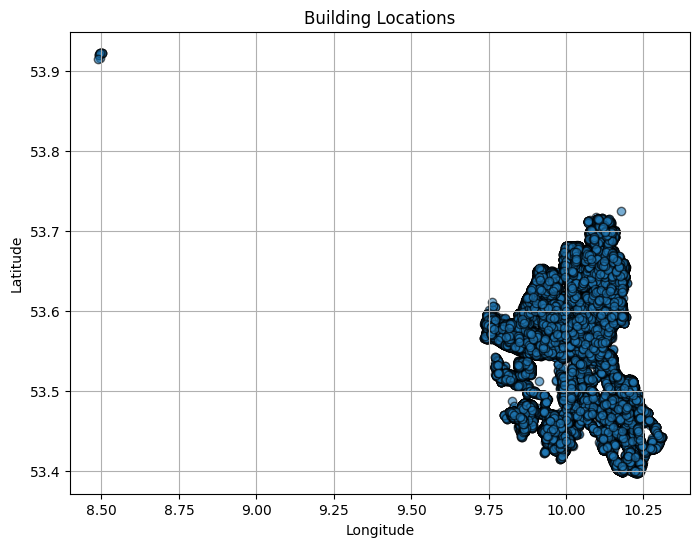

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.6, edgecolors='k')
plt.title('Building Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

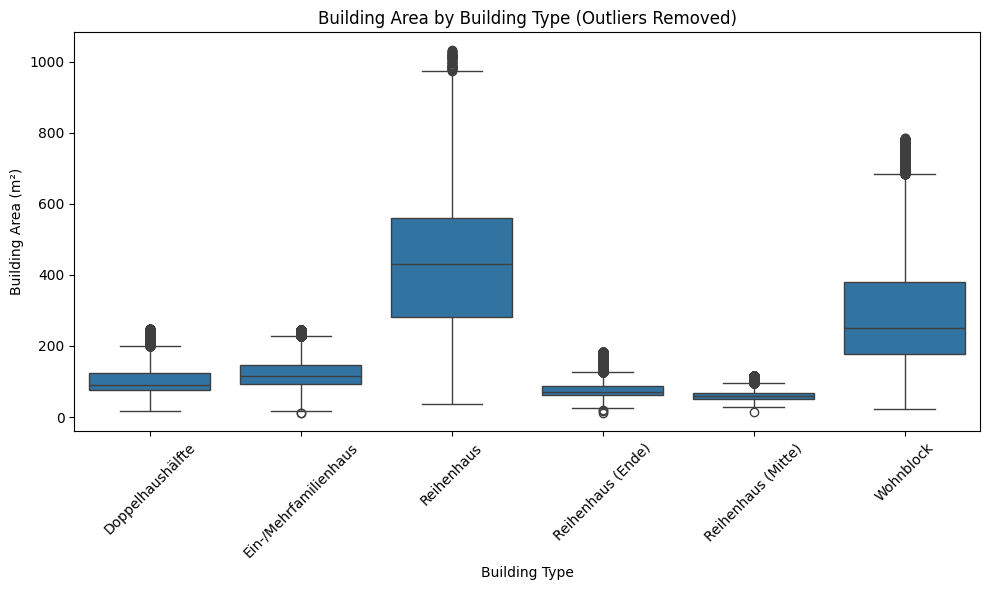

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_iqr(data, group_col, target_col):
    clean_df = pd.DataFrame()
    for group, subset in data.groupby(group_col):
        Q1 = subset[target_col].quantile(0.25)
        Q3 = subset[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered = subset[(subset[target_col] >= lower_bound) & (subset[target_col] <= upper_bound)]
        clean_df = pd.concat([clean_df, filtered])
    return clean_df

df_clean = remove_outliers_iqr(df, 'building_type', 'building_area')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='building_type', y='building_area')
plt.xticks(rotation=45)
plt.title('Building Area by Building Type (Outliers Removed)')
plt.xlabel('Building Type')
plt.ylabel('Building Area (m²)')
plt.tight_layout()
plt.show()

<ipython-input-170-b2fb5144a4d1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=building_counts, x='building_type', y='count', palette='viridis')


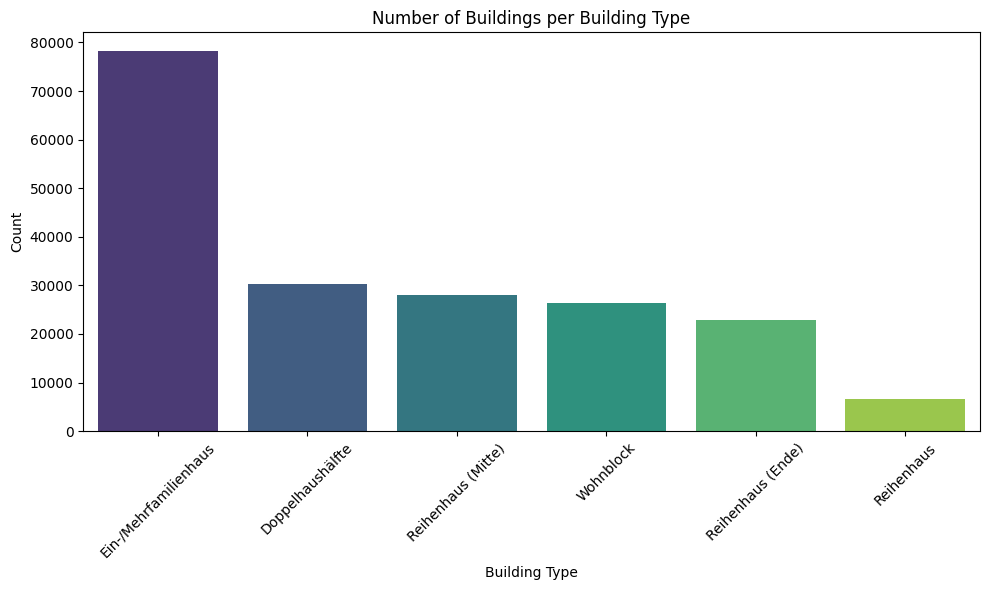

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

building_counts = df['building_type'].value_counts().reset_index()
building_counts.columns = ['building_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=building_counts, x='building_type', y='count', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Buildings per Building Type')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

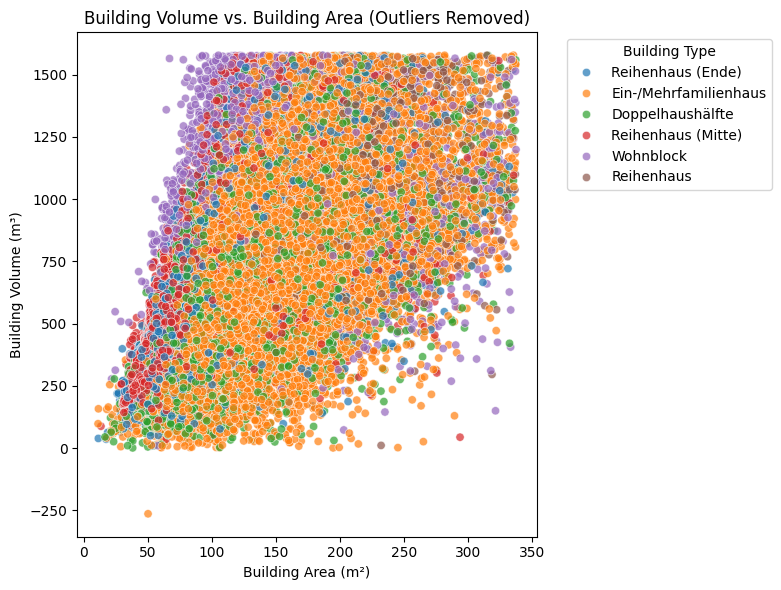

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from both columns
df = remove_outliers_iqr(df, 'building_area')
df = remove_outliers_iqr(df, 'body_volume')

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='building_area', y='body_volume', hue='building_type', alpha=0.7)
plt.title('Building Volume vs. Building Area (Outliers Removed)')
plt.xlabel('Building Area (m²)')
plt.ylabel('Building Volume (m³)')
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-172-a0d543a5758a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='coolwarm')


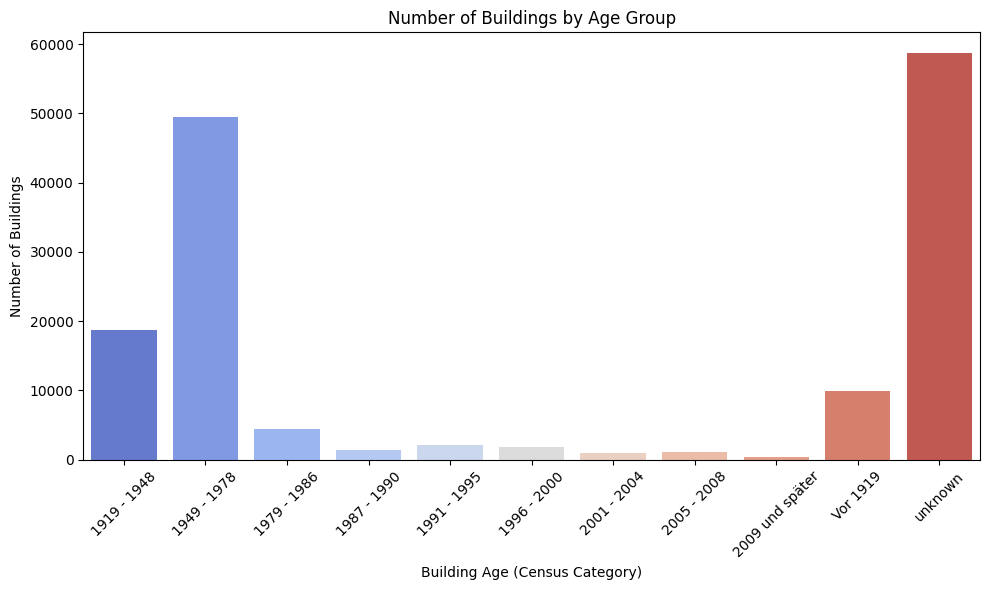

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_counts = df['building_age_census'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='coolwarm')
plt.title('Number of Buildings by Age Group')
plt.xlabel('Building Age (Census Category)')
plt.ylabel('Number of Buildings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

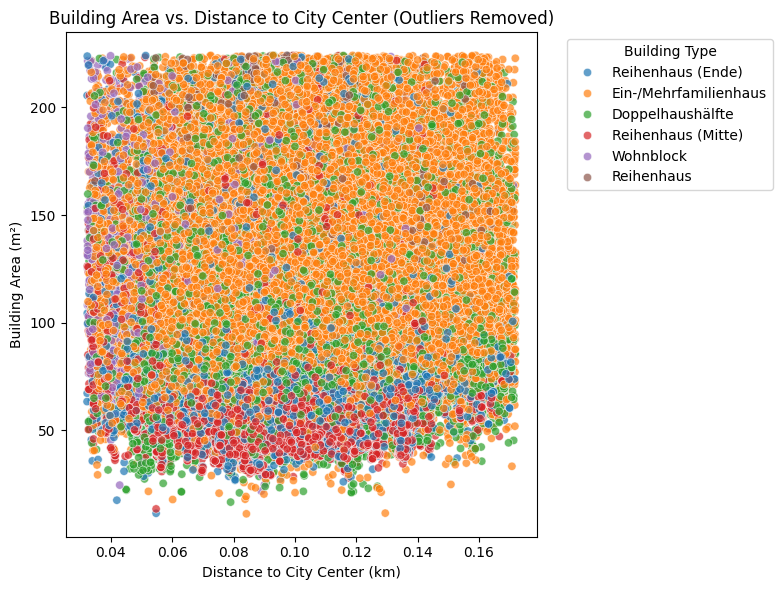

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'building_area')
df = remove_outliers_iqr(df, 'distance_to_city')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='distance_to_city', y='building_area', hue='building_type', alpha=0.7)
plt.title('Building Area vs. Distance to City Center (Outliers Removed)')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Building Area (m²)')
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

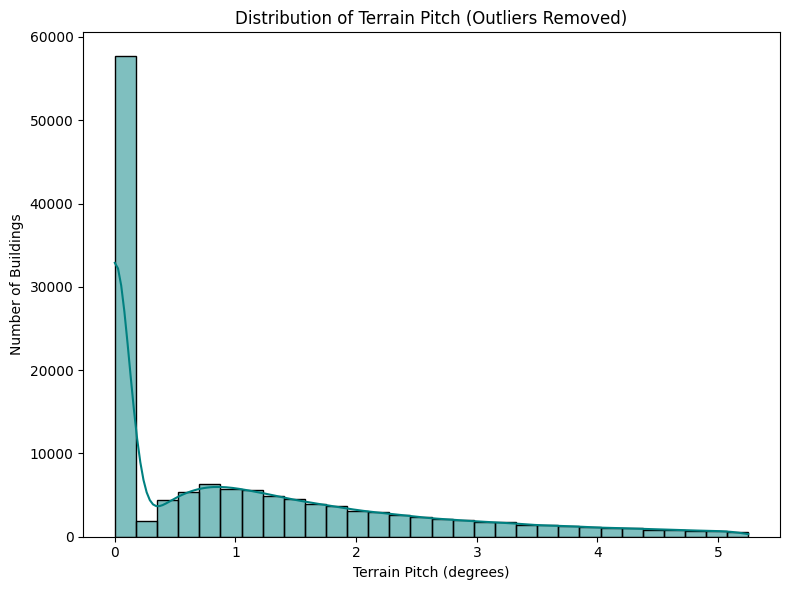

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'terrain_pitch_mean')

plt.figure(figsize=(8, 6))
sns.histplot(df['terrain_pitch_mean'], bins=30, kde=True, color='teal')
plt.title('Distribution of Terrain Pitch (Outliers Removed)')
plt.xlabel('Terrain Pitch (degrees)')
plt.ylabel('Number of Buildings')
plt.tight_layout()
plt.show()

<ipython-input-175-e1194453d118>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='building_function', palette='viridis')


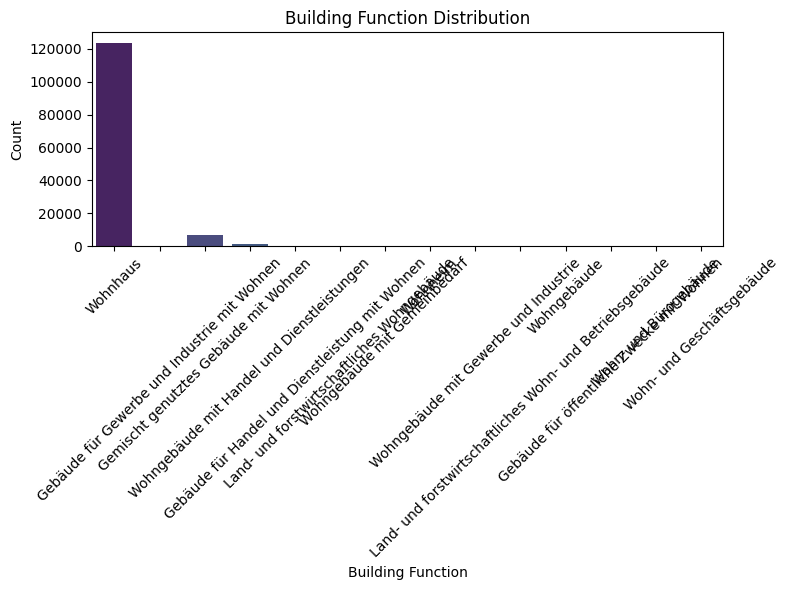

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='building_function', palette='viridis')
plt.title('Building Function Distribution')
plt.xlabel('Building Function')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

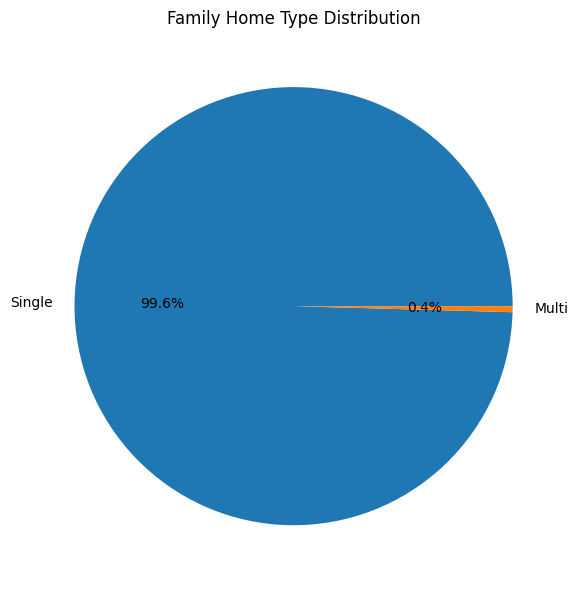

In [ ]:
family_home_counts = df['family_home'].value_counts()
family_home_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 6), colors=['#1f77b4', '#ff7f0e'])
plt.title('Family Home Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

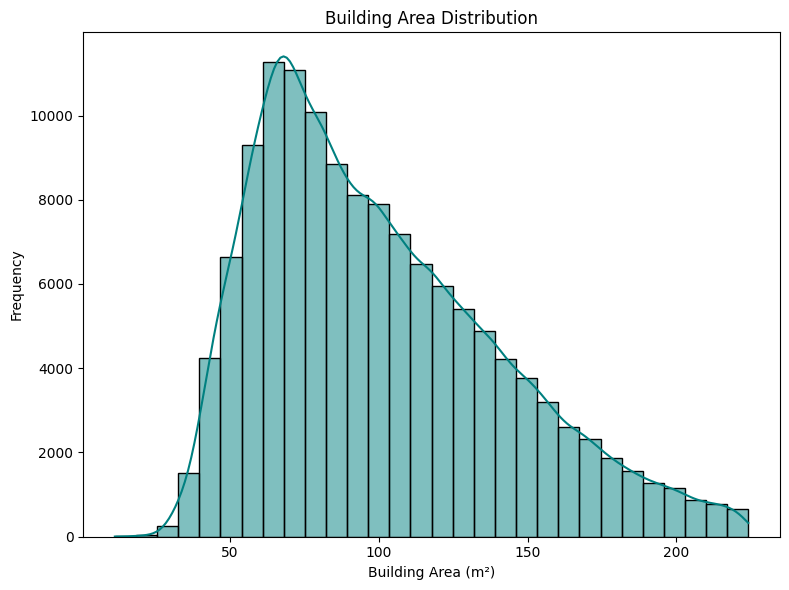

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['building_area'], bins=30, kde=True, color='teal')
plt.title('Building Area Distribution')
plt.xlabel('Building Area (m²)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

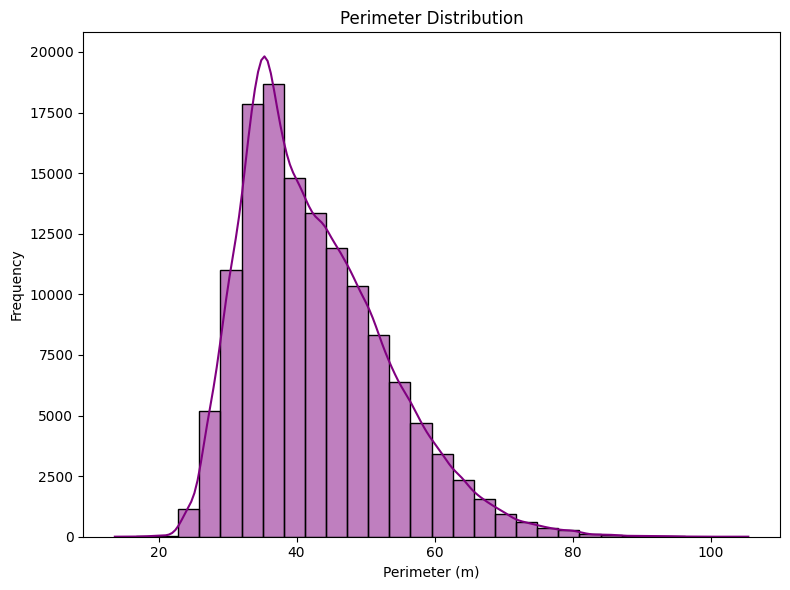

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['perimeter'], bins=30, kde=True, color='purple')
plt.title('Perimeter Distribution')
plt.xlabel('Perimeter (m)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

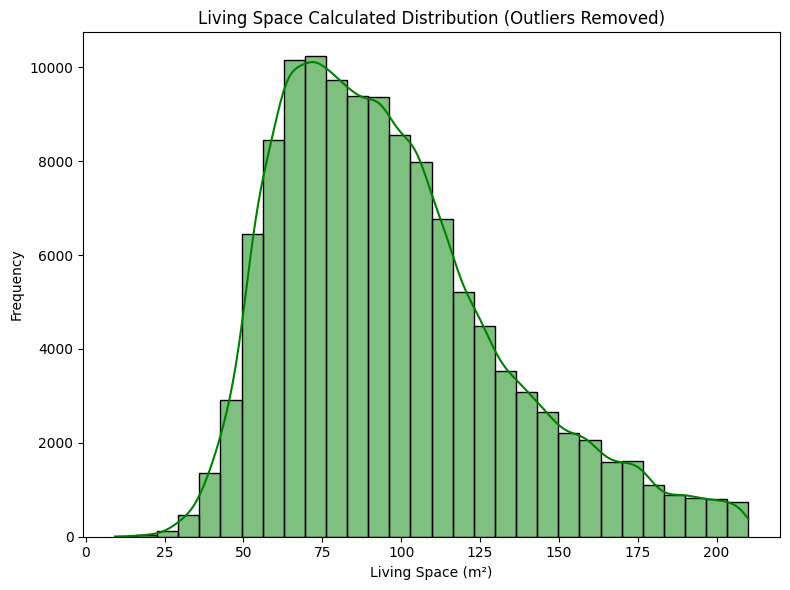

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'living_space_calculated')

plt.figure(figsize=(8, 6))
sns.histplot(df['living_space_calculated'], bins=30, kde=True, color='green')
plt.title('Living Space Calculated Distribution (Outliers Removed)')
plt.xlabel('Living Space (m²)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

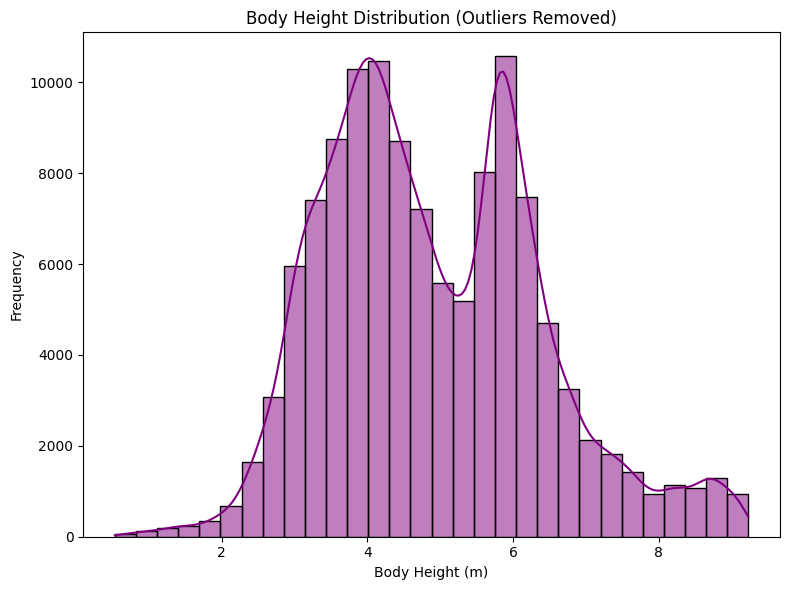

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'body_height')

plt.figure(figsize=(8, 6))
sns.histplot(df['body_height'], bins=30, kde=True, color='purple')
plt.title('Body Height Distribution (Outliers Removed)')
plt.xlabel('Body Height (m)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(120771, 19)

In [ ]:
df.to_csv('Hamburg_houses_EDA.csv', index=False)

# Model training

- Global Variables

In [ ]:
random_seed=1907
target_column = "building_type"
filename = "Hamburg_Houses_EDA.csv"

Define the models to use

- GaussianProcessClassifier is very hungry on resources, we were unable to train it
- GradientBoostingClassifier is quite slow

In [ ]:
models = []

from sklearn.ensemble import HistGradientBoostingClassifier
models.append(HistGradientBoostingClassifier(random_state=random_seed))

from sklearn.neighbors import KNeighborsClassifier
models.append(KNeighborsClassifier())

from sklearn.ensemble import RandomForestClassifier
models.append(RandomForestClassifier(random_state=random_seed))

from xgboost import XGBClassifier
models.append(XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"))

from sklearn.neural_network import MLPClassifier
models.append(MLPClassifier(alpha=1, max_iter=1000, random_state=random_seed))

from sklearn.linear_model import LinearRegression
models.append(LinearRegression())

Upload and read the dataset in csv format

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Hamburg_Houses_EDA.csv to Hamburg_Houses_EDA.csv


In [ ]:
import pandas as pd

df = pd.read_csv(f"/content/{filename}", index_col=0)

Take a look at the column types

Drop rows with missing target value

In [ ]:
df = df.dropna(subset=[target_column])

Prepare target values (transform labels to numbers)

In [ ]:
y = df[target_column]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Feature and Target Separation

In [ ]:
X = df.drop(target_column, axis=1) # 1 to drop column

# Encoding Categorical Features
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

Replace NAs with mean

In [ ]:
for column in X.select_dtypes(include=['number']).columns:
  X[column] = X[column].fillna(X[column].mean())

Split data 80/20

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=random_seed
)

In [ ]:
for model in models:
  model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from contextlib import suppress

# Evaluate
for model in models:
  y_pred = model.predict(X_test)
  print("\n\n\n> Model:", type(model).__name__)

  with suppress(ValueError):
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\nAccuracy:\n", accuracy_score(y_test, y_pred))

  print("\nMean Squared Error:\n", mean_squared_error(y_test, y_pred))  # Added MSE
  print("\nR-squared:\n", r2_score(y_test, y_pred))  # Added R-squared
  print('─' * 100)




> Model: HistGradientBoostingClassifier

Classification Report:
                        precision    recall  f1-score   support

     Doppelhaushälfte       0.65      0.14      0.23      4583
Ein-/Mehrfamilienhaus       0.69      0.95      0.80     11349
           Reihenhaus       0.42      0.30      0.35       141
    Reihenhaus (Ende)       0.50      0.24      0.32      3479
   Reihenhaus (Mitte)       0.65      0.81      0.72      4589
            Wohnblock       0.03      0.07      0.04        14

             accuracy                           0.66     24155
            macro avg       0.49      0.42      0.41     24155
         weighted avg       0.64      0.66      0.60     24155


Accuracy:
 0.6617263506520389

Mean Squared Error:
 1.1194783688677292

R-squared:
 0.4494117154404439
────────────────────────────────────────────────────────────────────────────────────────────────────



> Model: KNeighborsClassifier

Classification Report:
                        precision    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature importance in training

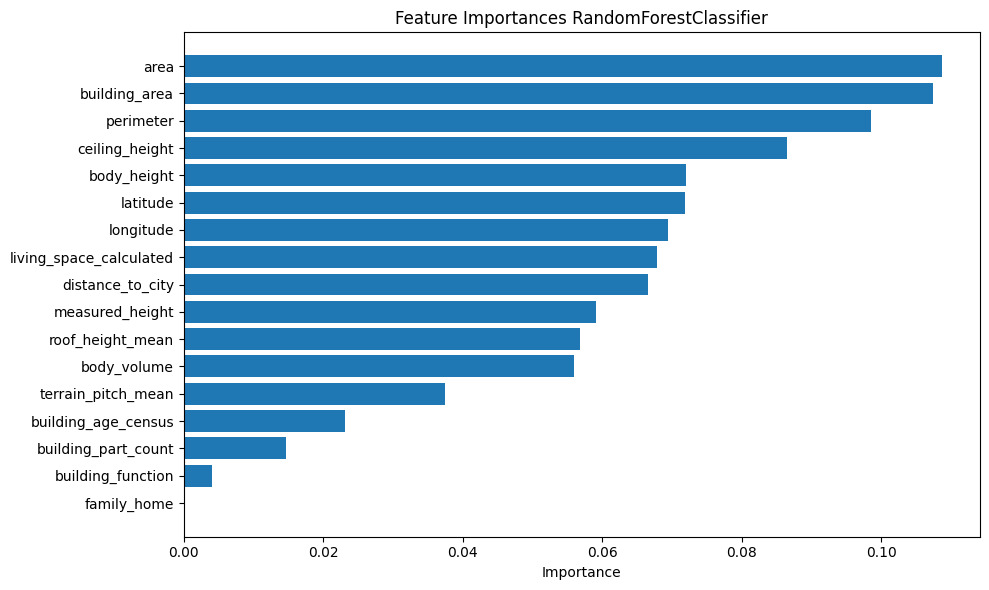

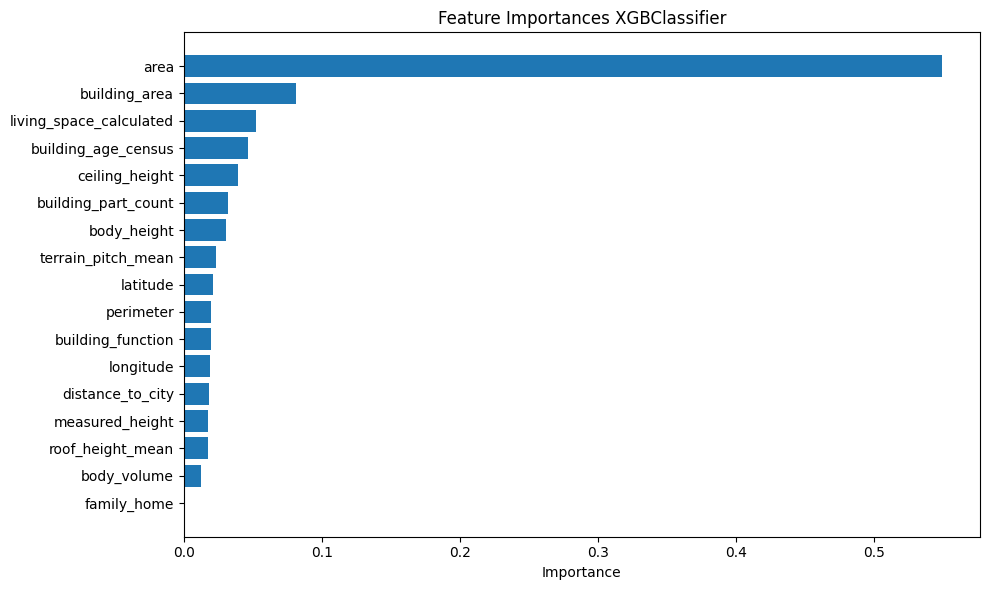

In [ ]:
import matplotlib.pyplot as plt
from contextlib import suppress
import numpy as np

for model in models:
  with suppress(AttributeError):
    importances = model.feature_importances_
    feature_names = X.columns
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances {type(model).__name__}")
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

# Feature Engineering


In [ ]:
# Building density calculation
# Group by latitude and longitude and sum up the building areas
building_density = df_clean_final.groupby(['latitude', 'longitude'])['building_area'].sum().reset_index()
# Rename the sum of building areas to 'building_density'
building_density.rename(columns={'building_area': 'building_density'}, inplace=True)
# Merge the building_density back to the original dataframe
df_clean_final = pd.merge(df_clean_final, building_density, on=['latitude', 'longitude'], how='left')
df_clean_final[['latitude', 'longitude', 'building_area', 'building_density']].head()

In [ ]:
# Combine 'building_area' and 'perimeter' to create a 'shape_factor' feature
# Assuming 'building_area' and 'perimeter' are in the DataFrame and are numeric.
# A simple shape factor could be Area / Perimeter^2 (or Perimeter / Area).
# We need to handle cases where perimeter might be zero or very small.

# Ensure the columns exist and are numeric
if 'building_area' in df_clean_final.columns and 'perimeter' in df_clean_final.columns:
    df_clean_final['building_area'] = pd.to_numeric(df_clean_final['building_area'], errors='coerce')
    df_clean_final['perimeter'] = pd.to_numeric(df_clean_final['perimeter'], errors='coerce')

    # Replace 0 or near-zero perimeter values to avoid division by zero
    epsilon = 1e-6
    df_clean_final['perimeter'] = df_clean_final['perimeter'].replace(0, np.nan)
    df_clean_final['perimeter'] = df_clean_final['perimeter'].fillna(epsilon) # Replace NaNs from 0s with epsilon

    # Create the new feature 'shape_factor' (Perimeter / Area)
    # You could choose other ratios like Area / Perimeter or Area / Perimeter^2 based on domain knowledge
    df_clean_final['shape_factor'] = df_clean_final['perimeter'] / df_clean_final['building_area']

    print("\nDataFrame with 'shape_factor' feature:")
    print(df_clean_final[['building_area', 'perimeter', 'shape_factor']].head())

    # Check for new NaNs
    print("\nMissing values after creating 'shape_factor':")
    print(df_clean_final['shape_factor'].isnull().sum())

    print("\n'building_area' or 'perimeter' columns not found in the DataFrame. Skipping 'shape_factor' feature creation.")


# Drafts

## XGBoost Classifier

In [ ]:
# Install XGBoost if not already installed
!pip install xgboost

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Replace 'your_file.csv' with the name of your file
df = pd.read_csv("Hamburg Houses.csv")
df.head()

,Unnamed: 0,latitude,longitude,building_area,building_type,building_function,family_home,building_part_count,area,perimeter,body_volume,roof_height_mean,measured_height,ceiling_height,living_space_calculated,body_height,terrain_pitch_mean,building_age_census,distance_to_city
0,0,53.690294,10.094055,82.447124,Reihenhaus (Ende),Wohnhaus,Single,1,82.39,37.55,509.0,0.940000,7.12,3.33,131.92,6.18,0.00,unknown,0.146815
1,1,53.469230,9.839075,99.420004,Ein-/Mehrfamilienhaus,Wohnhaus,Single,1,99.34,39.99,473.0,5.110000,9.89,7.33,79.54,4.77,0.00,unknown,0.128334
2,2,53.566455,9.828951,62.570851,Doppelhaushälfte,Wohnhaus,Single,3,62.52,33.11,103.0,0.000000,3.78,3.78,NaN,3.78,0.00,1949 - 1978,0.058638
3,3,53.454722,9.928948,70.597141,Reihenhaus (Ende),Wohnhaus,Single,2,70.55,35.58,555.0,2.890000,7.28,5.85,NaN,4.40,0.00,2009 und später,0.126264
4,4,53.570958,10.139567,53.835865,Reihenhaus (Mitte),Wohnhaus,Single,1,53.80,32.08,393.0,1.703984,8.08,3.60,100.11,6.30,2.85,unknown,0.110474


Step 3: Define Features and Target



In [ ]:
# Drop rows with missing target value
df = df.dropna(subset=["building_type"])

# Features (X): everything except the target column
X = df.drop("building_type", axis=1)

# Target (y): the building_type column
y = df["building_type"]


Step 4: Encode the Target Variable


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)  # y becomes numeric labels


Step 5: Split Data into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


-> convert catagorical columns - some of feature columns are still stored as text (object) or other unsupported types. XGBoost only works with numeric or properly encoded categorical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of X so we don’t affect original
X_encoded = X.copy()

# Apply LabelEncoder to object (text) columns
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        le = LabelEncoder()
        X_encoded[column] = le.fit_transform(X_encoded[column].astype(str))

# Now split and fit the model with X_encoded instead:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Step 6: Train the XGBoost Model

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:34:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Step 7: Make Predictions and Evaluate

In [ ]:
y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.676159718144451

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.25      0.35      6086
           1       0.70      0.91      0.79     15463
           2       0.63      0.59      0.61      1288
           3       0.49      0.22      0.30      4413
           4       0.66      0.72      0.68      5302
           5       0.74      0.86      0.79      4914

    accuracy                           0.68     37466
   macro avg       0.63      0.59      0.59     37466
weighted avg       0.65      0.68      0.64     37466



Step 8: Plot Feature Importances

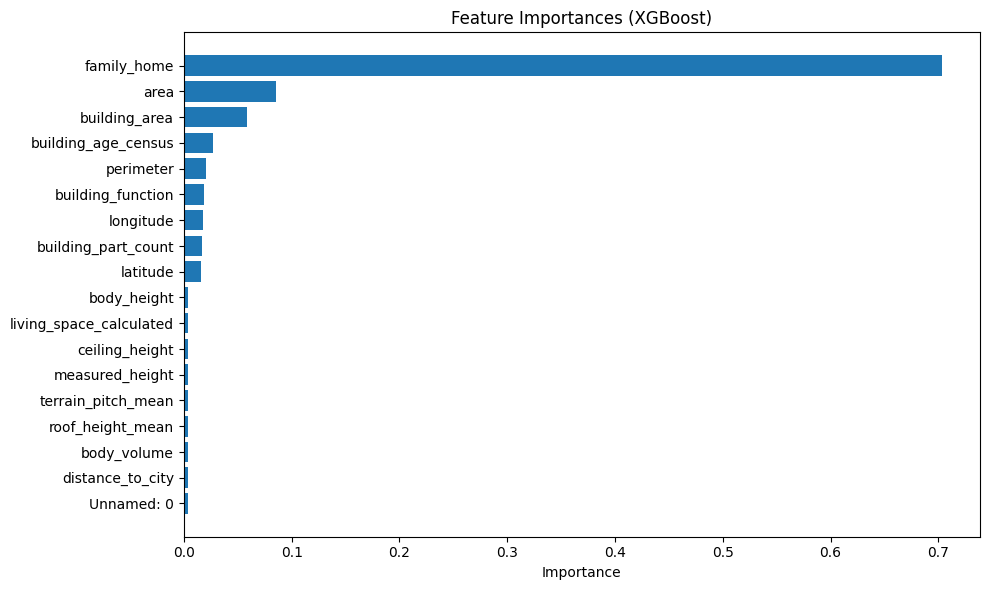

In [ ]:
importances = xgb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


## Linear Regression


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = load_diabetes() # This real-world dataset contains 442 samples with 10 medical features each
X = data.data # Input features: medical data for each patient
y = data.target # Target: disease progression score (a continuous value)
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1907)
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model parameters: intercept and coefficients for each feature
print("Intercept:", model.intercept_)
print("Coefficients", model.coef_)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Measure test performance
test_mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error (MSE):", test_mse)

Intercept: 150.6257896655178
Coefficients [   21.1820918   -197.04456478   548.05243166   299.32236749
 -1070.0989268    641.40280829   247.44288831   247.52093233
   839.04066745    79.22056818]
Test Mean Squared Error (MSE): 3331.6645679686335


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("/content/Hamburg_Houses.csv")

# Drop the unnamed index column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Define features (X) and target (y)
# Exclude 'building_type' from features
y = df["building_type"]
X = df.drop(columns=["building_type"])

# Encode the categorical target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1907)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Output model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate with MSE
mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", mse)


In [ ]:
X.isna().any()

,0
latitude,False
longitude,False
building_area,False
building_function,False
family_home,False
building_part_count,False
area,False
perimeter,False
body_volume,False
roof_height_mean,False


In [ ]:
# Column data types
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

if target_column in numeric_features:
    numeric_features.remove(target_column)
if target_column in categorical_features:
    categorical_features.remove(target_column)

print(target_column)
print(numeric_features)
print(categorical_features)

building_type
['latitude', 'longitude', 'building_area', 'building_part_count', 'area', 'perimeter', 'body_volume', 'roof_height_mean', 'measured_height', 'ceiling_height', 'living_space_calculated', 'body_height', 'terrain_pitch_mean', 'distance_to_city']
['building_function', 'family_home', 'building_age_census']


In [ ]:
def remove_outliers_iqr(data, group_col, target_col):
    clean_df = pd.DataFrame()
    for group, subset in data.groupby(group_col):
        Q1 = subset[target_col].quantile(0.25)
        Q3 = subset[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered = subset[(subset[target_col] >= lower_bound) & (subset[target_col] <= upper_bound)]
        clean_df = pd.concat([clean_df, filtered])
    return clean_df